In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, auc

In [3]:
diabetes_dataset = pd.read_csv('diabetes_prediction_dataset.csv')

# Gerar e salvar novo dataset contendo dados negativos
diabetes_negative = diabetes_dataset.loc[diabetes_dataset['diabetes'] == 0]
diabetes_negative.to_csv('diabetes_negative.csv', index=False)
diabetes_negative.shape

diabetes_positive = diabetes_dataset.loc[diabetes_dataset['diabetes'] == 1]
diabetes_positive.to_csv('diabetes_negative.csv', index=False)
diabetes_positive.shape

(8500, 9)

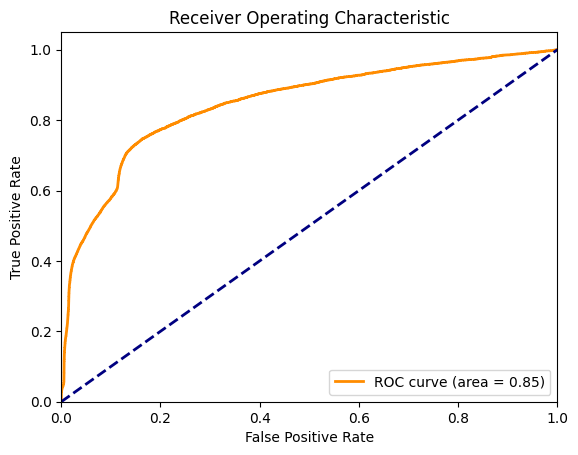

Área sob a curva ROC: 0.8476161317904211


In [10]:
X_train = diabetes_negative.drop(columns=['diabetes'])
X_test = diabetes_dataset.drop(columns=['diabetes'])
y = diabetes_dataset['diabetes']

# Codifica as colunas 'gender', 'smoking_history'
columns_to_encode = ['gender', 'smoking_history']
X_train_encoded = pd.get_dummies(X_train, columns=columns_to_encode)
X_test_encoded = pd.get_dummies(X_test, columns=columns_to_encode)

scaler = StandardScaler(with_mean=False)
scaler.fit(X_train_encoded)

X_train_scaled = scaler.transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

gmm = GaussianMixture(n_components=50, random_state=42, covariance_type='full')
gmm.fit(X_train_scaled)

test_scores = gmm.score_samples(X_test_scaled)

# Use o rótulo real dos dados de teste (diabetes) para criar os rótulos binários

# Calcule a curva ROC e a área sob a curva para cada componente
fpr, tpr, thresholds = roc_curve(y, -test_scores)  # Note the negation of test_scores
roc_auc = auc(fpr, tpr)

# # Definir um limite de decisão (você pode ajustar esse limite conforme necessário)
# threshold = 1  # Exemplo de limite, ajuste conforme necessário

# # Classificar os exemplos como positivos ou negativos com base no limite
# y_pred = (test_scores < threshold).astype(int)

# Calcule a curva ROC e a área sob a curva para cada componente
fpr, tpr, thresholds = roc_curve(y, -test_scores)  # Note a negação de test_scores

roc_auc = auc(fpr, tpr)

# accuracy = accuracy_score(y_true, y_pred)
# recall = recall_score(y_true, y_pred)
# precision = precision_score(y_true, y_pred)
# f1 = f1_score(y_true, y_pred)
# cm = confusion_matrix(y_true, y_pred)

# Plote a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print('Área sob a curva ROC:', roc_auc)
# print(f"Acurácia: {accuracy} \nRevocação: {recall} \nPrecisão: {precision} \nF1 score: {f1}")
